# Regression Analysis

In [1]:
import collections
import os
import re
import json

import numpy as np
import pandas as pd
import nltk
import sklearn.cross_validation as skcv
import sklearn.decomposition as skd
import sklearn.ensemble as skens
import sklearn.feature_extraction.text as skft
import sklearn.naive_bayes as sknb
import sklearn.pipeline as skpipe
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
import sklearn.preprocessing as skp
from ast import literal_eval
from nltk.util import ngrams
from sklearn import metrics
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, font_scale=1.3)
sns.set(style='white', color_codes=True, font_scale=1.3)

### Load data

In [2]:
df = pd.DataFrame.from_csv('combinedtrip.csv', index_col=0)

In [3]:
df = df.rename(columns=lambda x: x.strip())

In [4]:
df.shape

(1048575, 19)

In [5]:
df.head()

,hack_license,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
medallion,,,,,,,,,,,,,,,,,,,
89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,CSH,6.5,0.0,0.5,0,0,7.0,1,1/1/2013 15:11,1/1/2013 15:18,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,CSH,6.0,0.5,0.5,0,0,7.0,1,1/6/2013 0:18,1/6/2013 0:22,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,CSH,5.5,1.0,0.5,0,0,7.0,1,1/5/2013 18:49,1/5/2013 18:54,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,CSH,5.0,0.5,0.5,0,0,6.0,1,1/7/2013 23:54,1/7/2013 23:58,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,CSH,9.5,0.5,0.5,0,0,10.5,1,1/7/2013 23:25,1/7/2013 23:34,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


### Descriptive info and Correlation Matrix

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 89D227B655E5C82AECF13C3F540D4CF4 to 24AA0A5445265C487A5AFE194E9D112F
Data columns (total 19 columns):
hack_license         1048575 non-null object
vendor_id            1048575 non-null object
payment_type         1048575 non-null object
fare_amount          1048575 non-null float64
surcharge            1048575 non-null float64
mta_tax              1048575 non-null float64
tip_amount           1048575 non-null float64
tolls_amount         1048575 non-null float64
total_amount         1048575 non-null float64
rate_code            1048575 non-null int64
pickup_datetime      1048575 non-null object
dropoff_datetime     1048575 non-null object
passenger_count      1048575 non-null int64
trip_time_in_secs    1048575 non-null int64
trip_distance        1048575 non-null float64
pickup_longitude     1048575 non-null float64
pickup_latitude      1048575 non-null float64
dropoff_longitude    1048575 non-null float64
dropoff_latitude   

In [8]:
df.corr()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
fare_amount,1.000000,-0.078412,-0.274294,0.523503,0.590349,0.984036,0.517455,-0.006359,0.795389,0.893422,0.041237,-0.022801,0.049840,-0.024413
surcharge,-0.078412,1.000000,0.036136,-0.020360,-0.079100,-0.046398,-0.094818,-0.000817,-0.055554,-0.052572,-0.013420,0.007966,-0.015069,0.007753
mta_tax,-0.274294,0.036136,1.000000,-0.142131,-0.297238,-0.279742,-0.584108,0.014763,-0.050020,-0.111385,-0.092872,0.054143,-0.103545,0.051187
tip_amount,0.523503,-0.020360,-0.142131,1.000000,0.387059,0.650845,0.271286,-0.008246,0.429388,0.485677,0.027518,-0.014850,0.034010,-0.016682
tolls_amount,0.590349,-0.079100,-0.297238,0.387059,1.000000,0.654375,0.363729,-0.003867,0.418436,0.596532,0.000300,0.001414,0.005952,-0.003025
total_amount,0.984036,-0.046398,-0.279742,0.650845,0.654375,1.000000,0.512048,-0.007143,0.780787,0.889636,0.038871,-0.021257,0.047692,-0.023363
rate_code,0.517455,-0.094818,-0.584108,0.271286,0.363729,0.512048,1.000000,-0.023357,0.181440,0.308257,0.144505,-0.084255,0.165075,-0.082141
passenger_count,-0.006359,-0.000817,0.014763,-0.008246,-0.003867,-0.007143,-0.023357,1.000000,0.000586,0.007635,-0.002057,0.001298,-0.002595,-0.000908
trip_time_in_secs,0.795389,-0.055554,-0.050020,0.429388,0.418436,0.780787,0.181440,0.000586,1.000000,0.803898,-0.030728,0.019161,-0.037347,0.018865
trip_distance,0.893422,-0.052572,-0.111385,0.485677,0.596532,0.889636,0.308257,0.007635,0.803898,1.000000,-0.020112,0.013105,-0.024312,0.011937


### OLS Regression Model finds weak relationship between fare amount and toll amount
>While not a hugely positive relationship, tolls may be a significant factor in determining fare amount because longer trips tend to cost more, and longer trips mean the likelyhood of toll charges increases. So, the presence of toll charges could be an indicator of high fare trips.

In [9]:
model1 = smf.ols('fare_amount ~ tolls_amount', data=df).fit()
model1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                 5.609e+05
Date:                Mon, 14 Dec 2015   Prob (F-statistic):               0.00
Time:                        02:30:54   Log-Likelihood:            -3.7050e+06
No. Observations:             1048575   AIC:                         7.410e+06
Df Residuals:                 1048573   BIC:                         7.410e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       10.7605      0.008   1300.531      0.000        10.744    10.777
tolls_amount     5.2910      0.007    748.953      0.000         5.277     5.305
==============================================================================
Omnibus:                  1201221.602   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        644544104.259
Skew:                           5.377   Prob(JB):                         0.00
Kurtosis:                     123.983   Cond. No.                         1.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Scatterplots revealing relationships between fare, trip distance, passenger count, tip amount, and payment type
>I'm not sure why the array error is being produced, but it took a lot of documentation searching to figure out how to set the x and y axis limits for seaborn plots. Without the limits, some of the graphs display empty negative space.

AttributeError: 'numpy.ndarray' object has no attribute 'set_ylim'

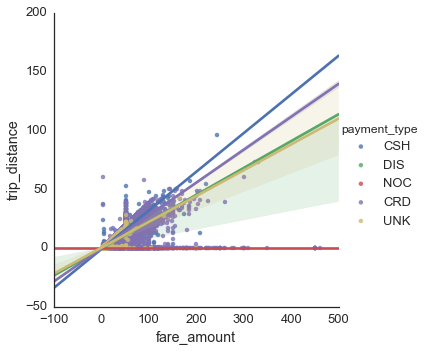

In [10]:
lm = sns.lmplot('fare_amount', 'trip_distance', 
           data=df,
           hue='payment_type', fit_reg=True);
axes = lm.axes
axes.set_ylim(0,)
axes.set_xlim(0,)

In [8]:
#Passenger count and tip amount are negatively correlated

(0, 200.0)

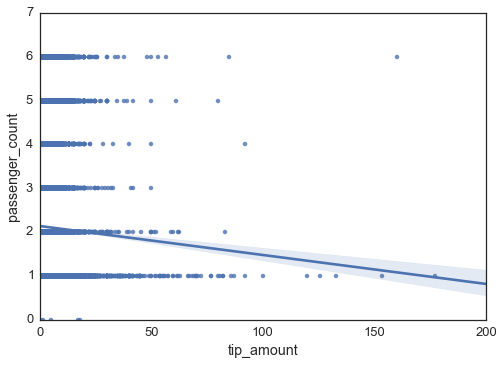

In [14]:
lm = sns.regplot('tip_amount', 'passenger_count', 
           data=df, fit_reg=True);

axes = lm.axes
axes.set_ylim(0,)
axes.set_xlim(0,)

### Seaborn pairplot to point out feature correlations and allow for side-by-side comparison

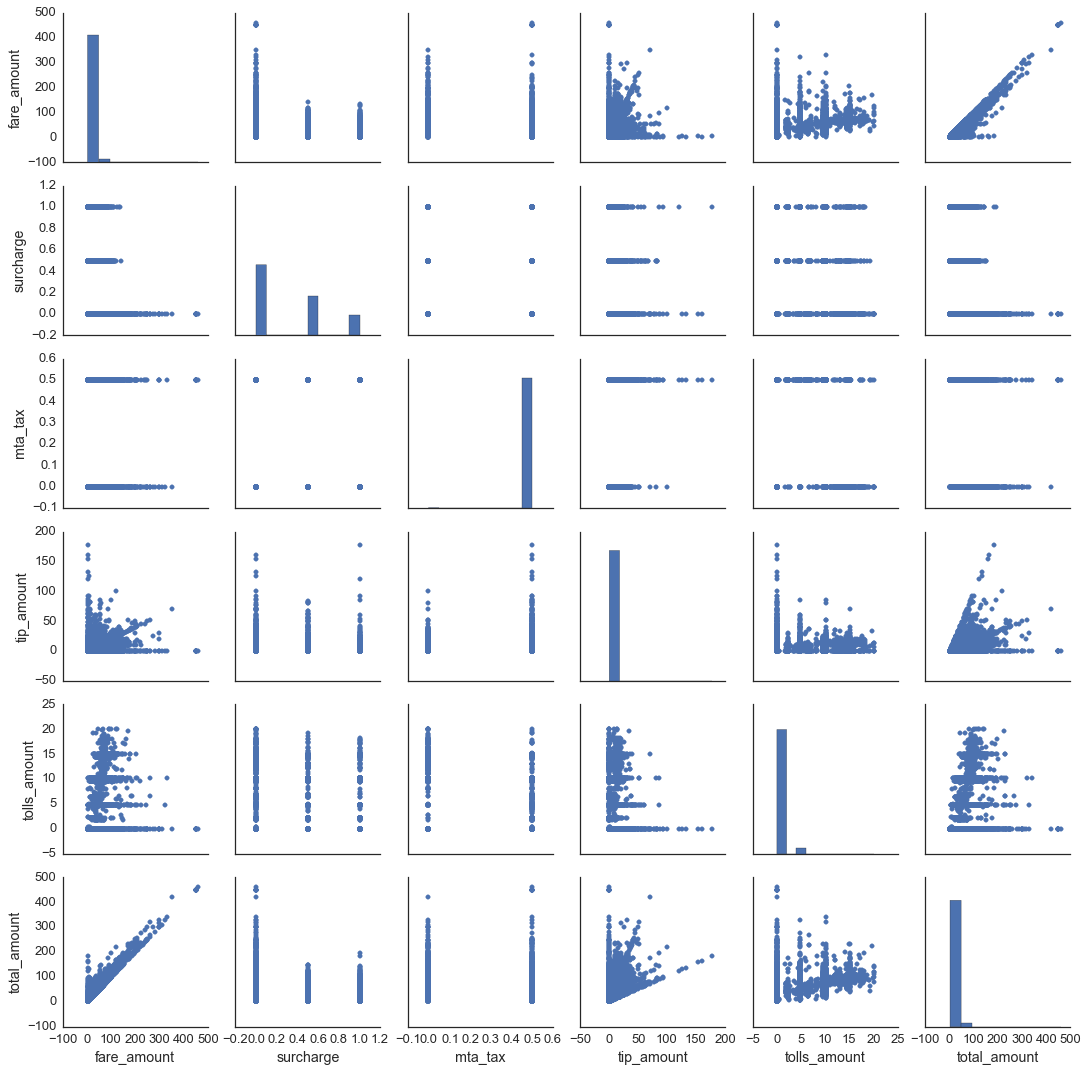

In [15]:
dfpair = df.ix[:,3:9]

sns.pairplot(dfpair);

### More seaborn scatterplots and regression models revealing correlation levels

(0, 500.0)

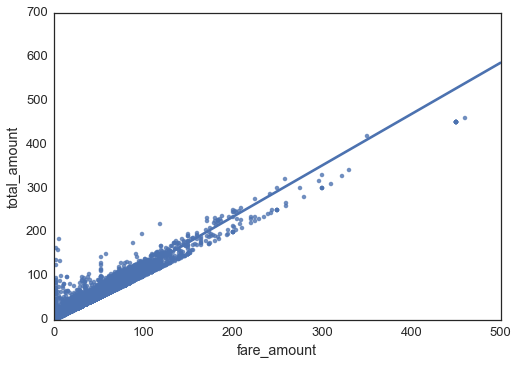

In [16]:
lm = sns.regplot(x="fare_amount", y="total_amount", data=df)
axes = lm.axes
axes.set_ylim(0,)
axes.set_xlim(0,)

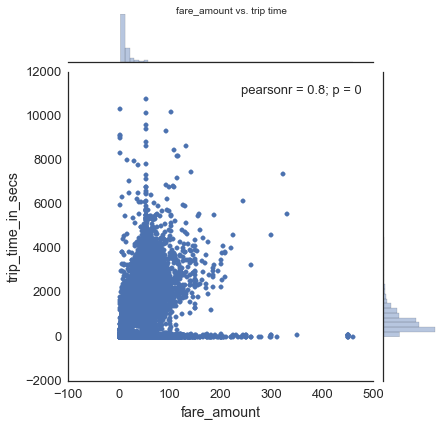

In [17]:
sns.jointplot(x='fare_amount', y='trip_time_in_secs', data=df);

plt.suptitle("fare_amount vs. trip time")

In [18]:
model = smf.ols('tip_amount ~ trip_distance', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                 3.237e+05
Date:                Mon, 14 Dec 2015   Prob (F-statistic):               0.00
Time:                        02:49:26   Log-Likelihood:            -2.1502e+06
No. Observations:             1048575   AIC:                         4.300e+06
Df Residuals:                 1048573   BIC:                         4.300e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.4203      0.002    174.162      0.000         0.416     0.425
trip_distance     0.3050      0.001    568.941      0.000         0.304     0.306
==============================================================================
Omnibus:                  1425469.033   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4775813379.811
Skew:                           6.872   Prob(JB):                         0.00
Kurtosis:                     333.335   Cond. No.                         6.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### This correlation graph runs pearson, spearman, and kendall tests for trip distance, passenger count, tip amount, and fare amount against the total amount
>Passenger count has almost no correlation with total amount. Trip distance and fare are highly correlated with the total amount, and tip amout is moderately correlated.

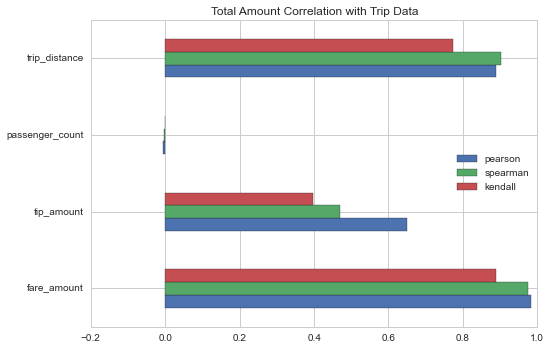

In [19]:
corr_metrics = ['pearson', 'spearman', 'kendall']
other_measurements = ['fare_amount', 'tip_amount', 
                      'passenger_count','trip_distance']
cols = {m: [df['total_amount'].corr(df[x], method=m) 
            for x in other_measurements] 
        for m in corr_metrics}
df_corr = pd.DataFrame(cols, index=other_measurements,
                       columns=corr_metrics)
sns.set(style='whitegrid')
df_corr.plot(kind='barh', 
             title='Total Amount Correlation with Trip Data');

### This scatterplot illustrates the high positive relationship between tolls and fare amount.

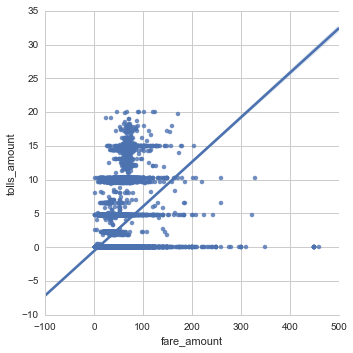

In [21]:
sns.lmplot(x='fare_amount', y='tolls_amount', 
           data=df, fit_reg=True, x_jitter=.1);

### I created a tip ratio column by dividing tip amount by fare amount and then sorted by that new column
>The max ratio is 64 and, unfortunately for cab drivers, the lowest is 0 (which is a frequent tip ratio).

>The seaborn regression plot at the bottom of the page displays the slight positive correlation between tip ratio and trip distance.

In [5]:
dftip = df.copy()
dftip["Tip_Ratio"] = (dftip["tip_amount"] / dftip["fare_amount"])

dftip.sort(["Tip_Ratio"], axis=0, ascending=False)

,hack_license,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Tip_Ratio
medallion,,,,,,,,,,,,,,,,,,,,
7B9EEBB6260EFD3D6523176C5088670E,3B8AC94620C43B364A42B3A7D1439B68,VTS,CRD,2.5,0.0,0.5,160.00,0.0,163.00,1,1/13/2013 16:28,1/13/2013 16:28,6,0,0.00,0.000000,0.000000,0.000000,0.000000,64.000000
5962CEB4E6066574DBF1A68FEA600E23,D2C1BB8A250C037412AA6349ED24AC87,VTS,CRD,2.5,0.0,0.5,132.80,0.0,135.80,1,1/13/2013 19:47,1/13/2013 19:47,1,0,0.00,0.000000,0.000000,0.000000,0.000000,53.120000
4EE20C42C8FDC2AE756897934A8DC863,28B3ADA18F20647863C9A45BCAAA017A,VTS,CRD,2.5,1.0,0.5,120.00,0.0,124.00,1,1/15/2013 17:58,1/15/2013 17:58,1,0,0.00,0.000000,0.000000,0.000000,0.000000,48.000000
FFCFA7AFF0DE2B5081C6C1A11099A691,1E7A868D88D7E66EA50B8D657F833BA2,VTS,CRD,2.5,0.0,0.5,92.00,0.0,95.00,1,1/1/2013 15:20,1/1/2013 15:20,1,0,0.00,0.000000,0.000000,0.000000,0.000000,36.800000
835A8B3E36118DDEF7742F790E649727,317799A8C9027ED5E9CBB1DEB38238D9,VTS,CRD,2.5,0.0,0.5,87.00,0.0,90.00,1,1/13/2013 14:54,1/13/2013 15:00,1,360,0.00,-74.177078,40.691368,-74.177071,40.691376,34.800000
F7C12E33920E11DCDFE2C05E2C2FC3FD,1E16C547E663101CAB27C74BFAABFEBB,VTS,CRD,4.5,0.0,0.5,153.35,0.0,158.35,1,1/1/2013 12:57,1/1/2013 12:59,1,120,0.79,-73.998032,40.740810,-74.000999,40.732567,34.077778
0781114756BA7B16D8B8898C87F6D4BD,34043DA52C99CB18990B93561E914410,VTS,CRD,2.5,0.5,0.5,83.00,0.0,86.50,1,1/1/2013 4:26,1/1/2013 4:29,2,180,0.00,-73.963364,40.918819,-73.963371,40.918819,33.200000
EB8B79BF3D28C7DBC509736F0846A363,008BE4F3FF93935048998BB183D27263,VTS,CRD,2.5,0.5,0.5,80.00,0.0,83.50,1,1/16/2013 5:42,1/16/2013 5:42,5,0,0.00,-73.984436,40.835361,0.000000,0.000000,32.000000
0EC22AAF491A8BD91F279350C2B010FD,6CE2E00221A6D932C1328D3DA582FDFC,VTS,CRD,2.5,0.0,0.5,77.00,0.0,80.00,1,1/14/2013 12:25,1/14/2013 12:26,1,60,0.00,-74.048958,40.828037,-74.048981,40.828030,30.800000


(0, 70.0)

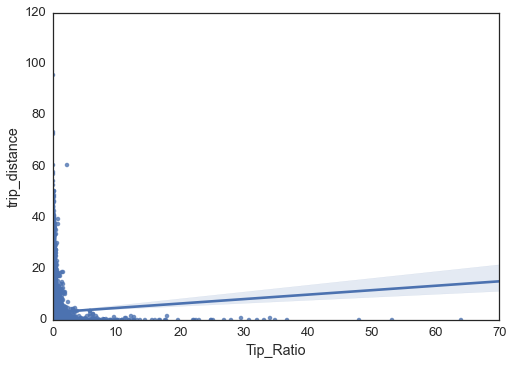

In [7]:
lm = sns.regplot('Tip_Ratio', 'trip_distance', data=dftip, fit_reg=True);

axes = lm.axes
axes.set_ylim(0,)
axes.set_xlim(0,)